In [1]:
import pandas as pd
import numpy as np

In [4]:
def get_data(grade, subject):
    ret = pd.read_excel(
        "data/"+str(grade)+"th grade "+subject+".xls",
        header=[0,1], skiprows=10)
    
    for i, col in enumerate(ret.columns.levels):
        columns = np.where(col.str.contains('Unnamed'), '', col)
        ret.columns.set_levels(columns, level=i, inplace=True)

    ret["","Year"] = ret["","Year"].fillna(method="ffill")
    
        
    flat_columns = []
    for col in ret.columns:
        flat_columns.append((col[0] + " " + col[1]).strip())
        
    ret.columns = flat_columns
    
    for c in ret.columns[2:]:
        ret[c] = pd.to_numeric(ret[c],errors="coerce")
    
    ret = ret.dropna(thresh = 4)
    
    left = pd.pivot_table(ret,index=["Year"],
                        values=["Eligible Average scale score"],
                        columns=["Jurisdiction"])

    right = pd.pivot_table(ret,index=["Year"],
                        values=["Not eligible Average scale score"],
                        columns=["Jurisdiction"])
    
    ret = left.join(right)a
    
    ret["subject"] = subject
    ret["grade"] = grade

        
    return ret


get_data(4,"reading").sort_index(ascending=False)

NaN                                                 2015
NaN                                                 2015
NaN                                                 2015
NaN                                                 2013
NaN                                                 2013
NaN                                                 2013
NaN                                                 2011
NaN                                                 2011
NaN                                                 2011
NaN                                                 2009
NaN                                                 2009
NaN                                                 2009
NaN                                                 2007
NaN                                                 2007
NaN                                                 2007
NaN                                                 2005
NaN                                                 2005
NaN                            

Eligible Average scale score                            \
Jurisdiction                  Connecticut Massachusetts    National   
Year                                                                  
2015                           208.995502    219.659334  209.258765   
2013                           209.802332    213.332436  207.464591   
2011                           205.245963    218.483897  206.871771   
2009                           207.442969    214.935868  206.022551   
2007                           200.675301    214.397741  205.022471   
2005                           202.240069    210.502145  202.861465   
2003                           205.433871    209.783172  201.271359   
2002                           209.355976    214.861224  202.860216   
2000¹                                 NaN           NaN  195.657856   
2000                                  NaN           NaN  192.526546   
1998¹                          205.131305    205.285740  198.315226   
1998                           202.565062    202.589526  195.647965   

             Not eligible Average scale score                            \
Jurisdiction                      Connecticut Massachusetts    National   
Year                                                                      
2015                               240.143237    246.736509  236.858798   
2013                               241.845034    244.775365  236.128980   
2011                               240.576557    245.881441  234.588460   
2009                               237.916422    243.028334  232.218003   
2007                               238.516384    243.487668  232.024429   
2005                               234.836036    238.945929  230.043418   
2003                               238.324874    236.251899  229.401499   
2002                               236.967441    241.017482  229.619160   
2000¹                                     NaN           NaN  227.408302   
2000                                      NaN           NaN  226.158946   
1998¹                              239.985449    233.352477  227.498641   
1998                               237.956046    230.450744  226.996537   

              subject grade  
Jurisdiction                 
Year                         
2015          reading     4  
2013          reading     4  
2011          reading     4  
2009          reading     4  
2007          reading     4  
2005          reading     4  
2003          reading     4  
2002          reading     4  
2000¹         reading     4  
2000          reading     4  
1998¹         reading     4  
1998          reading     4

In [5]:
import matplotlib
#matplotlib.use( "agg" )
# matplotlib.use( "macosx" )

%matplotlib inline
# matplotlib.style.use('ggplot')
matplotlib.style.use('mirror00')
import matplotlib.pyplot as plt


Bad key "axes.Axes.margins" on line 38 in
/Users/jakekara/.matplotlib/stylelib/mirror00.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'National', u'']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, u'Jurisdiction'])


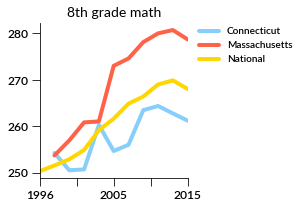

In [4]:
def make_chart(df,col='Eligible Average scale score'):
    print df.columns
    ax = df[col].plot()
    #ax.set_ylim(ymin=0)
    
    grade = df["grade"][0]
    subject = df["subject"][0]
    
    ax.set_title(str(grade) + "th grade " + subject)    
    fname = "img/"+str(grade)+ "th grade " + str(subject) + ".png"
    svgname = "img/"+str(grade)+ "th grade " + str(subject) + ".svg"
    ax.set_xlabel("")
    ax.set_ylabel("")
    
#     plt.legend(bbox_to_anchor=(0.5,0.5),bbox_transform=plt.gcf().transFigure)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()
    
    
    plt.savefig(fname,bbox_extra_artists=(lgd,),bbox_inches="tight")
    plt.savefig(svgname,bbox_extra_artists=(lgd,),bbox_inches="tight")
    
    return ax
    
make_chart(get_data(8,"math"))

In [5]:
np.max([1,2,3])

3

MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'National', u'']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, u'Jurisdiction'])


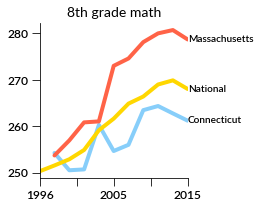

In [6]:
def line_last_x(line):    
    return line.get_xdata()[-1]

def line_max(line):
    i = 0;
    y = None
    x = None
    for v in np.array(line.get_ydata()):
        if np.isnan(v):
            continue
        if y is None or y < v:
            y = v
            x = line.get_xdata()[i]
        i+=1
    return (x, y)
    
def line_last_y(line):
    ret = filter(lambda x: not np.isnan(x), np.array(line.get_ydata()))[-1]
    return ret

def line_max_y(line):
    
    return np.max(
        lambda x: not np.isnan(x),
        np.array(line.get_ydata()))

def line_min_y(line):
    return np.min(line.get_ydata())
    
def line_label(line):
    return line.get_label()

def no_legend(ax,how="label_right"):
    
    ax.legend_.remove()
    
    for line in ax.lines:
        line_label(line)

        line_last_x(line)
        line_last_y(line)
        
        #line.set_color("gray")

        if how == "label_right":
            x = line_last_x(line)
            y = line_last_y(line)
            ax.text(x, y,
                    line_label(line),
                    verticalalignment = "center")
    
#         if True is True:
# #         if how == "annotate_highest":
#             ax.annotate(line_label(line), 
#                         xy=line_max(line),
#     #                     xy=(10, line_last_y(line)),
#                         arrowprops=dict(facecolor='black',
#                                         arrowstyle="-"),
#                                         verticalalignment='center')
        #plt.show()
        
#         if True is True:
#             ax.annotate(line_label(line), 
#                         xy=line_max(line),
#                         xytext=(10, line_last_y(line)),
#                         arrowprops=dict(facecolor='black',
#                                         arrowstyle="-"),
#                                         verticalalignment='center')

 
no_legend(make_chart(get_data(8,"math")))

MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'National', u'']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, u'Jurisdiction'])
MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'National', u'']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, u'Jurisdiction'])
MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'National', u'']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 3], [0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, u'Jurisdiction'])
MultiIndex(levels=[[u'Eligible Average scale score', u'Not eligible Average scale score', u'subject', u'grade'], [u'Connecticut', u'Massachusetts', u'Nati

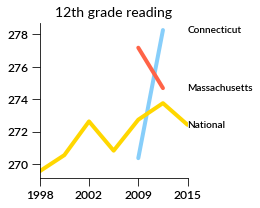

In [7]:
def make_all_charts():
    for grade in [4,8,12]:
        for subject in ["math","reading"]:
            plt.close()
            no_legend(make_chart(get_data(grade, subject)))
            
make_all_charts()

### 